# **Quantum Computing Mentorship Program**

## **Screening Task 1**

**Importing Standard Qiskit and Python Modules**

In [2]:
from qiskit import*
from qiskit.tools.visualization import*
from matplotlib.pyplot import*
from numpy import*
from random import*
from sympy.physics.quantum import*
from qiskit.circuit.library import*
from qiskit.extensions import*
from qiskit.quantum_info import*

**Problem 1**

We provide a variational (also called parametric) circuit which is able to generate the most general 1 qubit state. By most general 1 qubit state we mean that there exists a set of the parameters in the circuit such that any point in the Bloch sphere can be reached. Then it is checked whether the circuit works correctly by showing that by varying randomly the parameters of your circuit we can reproduce correctly the Bloch sphere.

Components of State Vector are [ 0.34276436+0.j         -0.57580102+0.74227069j]


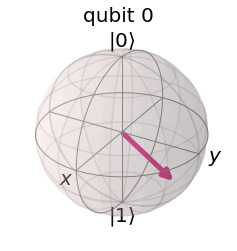

In [3]:
#Creation of a parameteric circuit

qr1=QuantumRegister(1)
cr1=ClassicalRegister(1)
qc1=QuantumCircuit(qr1,cr1)
backend=BasicAer.get_backend('statevector_simulator')

def param_circuit(a,b,c,qr,qc): 
    qc.u(a,b,c,qr)
"""
function "param_circuit" take five inputs where a,b,c is the euler angles of rotation(theta,phi,lambda).
where 'qr' and 'qc' specifies the register and circuit where function is applied.
"""   
    
a,b,c=uniform(0,2*pi),uniform(0,2*pi),uniform(0,2*pi)  #a,b,c generated by means of  uniform random generators (numpy module)  
param_circuit(a,b,c,0,qc1)

out_vector=execute(qc1,backend).result().get_statevector()
print('Components of State Vector are',out_vector)
plot_bloch_multivector(out_vector)

**Problem 2**

Now we use the circuit built in **Problem 1** and, using the SWAP test, we find the best choice of parameters to reproduce a randomly generated quantum state made with 1 qubit. The Swap test is a simple quantum circuit which, given two states, allows to compute how much do they differ from each other.

optimal parameters are : [0.6283185307179586, 5.026548245743669, 0]


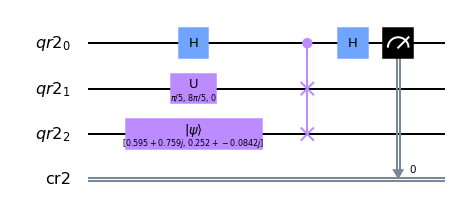

In [8]:
# swap test of a random state and finding out optimal parameters of a parametric circuit

backend=BasicAer.get_backend('qasm_simulator')

def swap_test(a,b,c,qc):
    qc.h(a)
    qc.cswap(a,b,c)
    qc.h(a)
    #qc.measure(a,a)

count=[] 
param=[]

s=1 # the value of seed we using while genereating random state. Varying seed we can alter state we produce.

for a in arange(0,2,0.1):
    a=a*pi
    c=0
    for b in arange(0,2,0.1):
        b=b*pi
        qr2=QuantumRegister(3,name='qr2')
        cr2=ClassicalRegister(1,name='cr2')
        qc=QuantumCircuit(qr2,cr2)

        # intialising 3rd qubit to an arbitrary state
        initial_state = qc.initialize(random_statevector(2,seed=s).data, 2) 
    
        param_circuit(a,b,c,1,qc)
        swap_test(0,1,2,qc)
        qc.measure(0,0)
        counts=execute(qc,backend,shots=1024).result().get_counts()
        count.append(counts['0'])
        param.append([a,b,c])
        counts.clear()
    
i=count.index(max(count))
par=param[i]            # this list contains optiml parameters required
print('optimal parameters are :',par)

a,b,c=par[0],par[1],par[2]
qc2=QuantumCircuit(qr2,cr2)
initial_state = qc2.initialize(random_statevector(2,seed=s).data, 2) 
param_circuit(a,b,c,1,qc2)
swap_test(0,1,2,qc2)
qc2.measure(0,0)
qc2.draw(output='mpl')

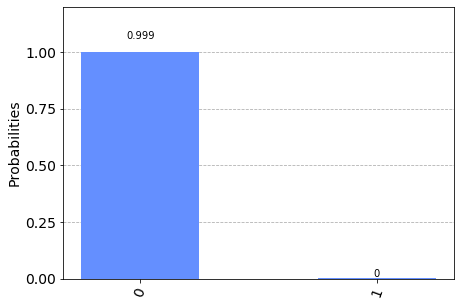

In [9]:
counts=execute(qc2,backend,shots=1024).result().get_counts()
plot_histogram(counts)

**Problem 3**

Suppose we are given with a random state, made by N qubits, which is a product state and each of the qubits are in the state | 0 > or | 1>. By product state we mean that it can be written as the product of single qubit states, without the need to do any summation. For example, the state

|a> = |01>

Is a product state, while the state

|b> = |00> + |11>   Is not.

We perform a qubit by qubit SWAP test to reconstruct the state. 

The random state is |11011>


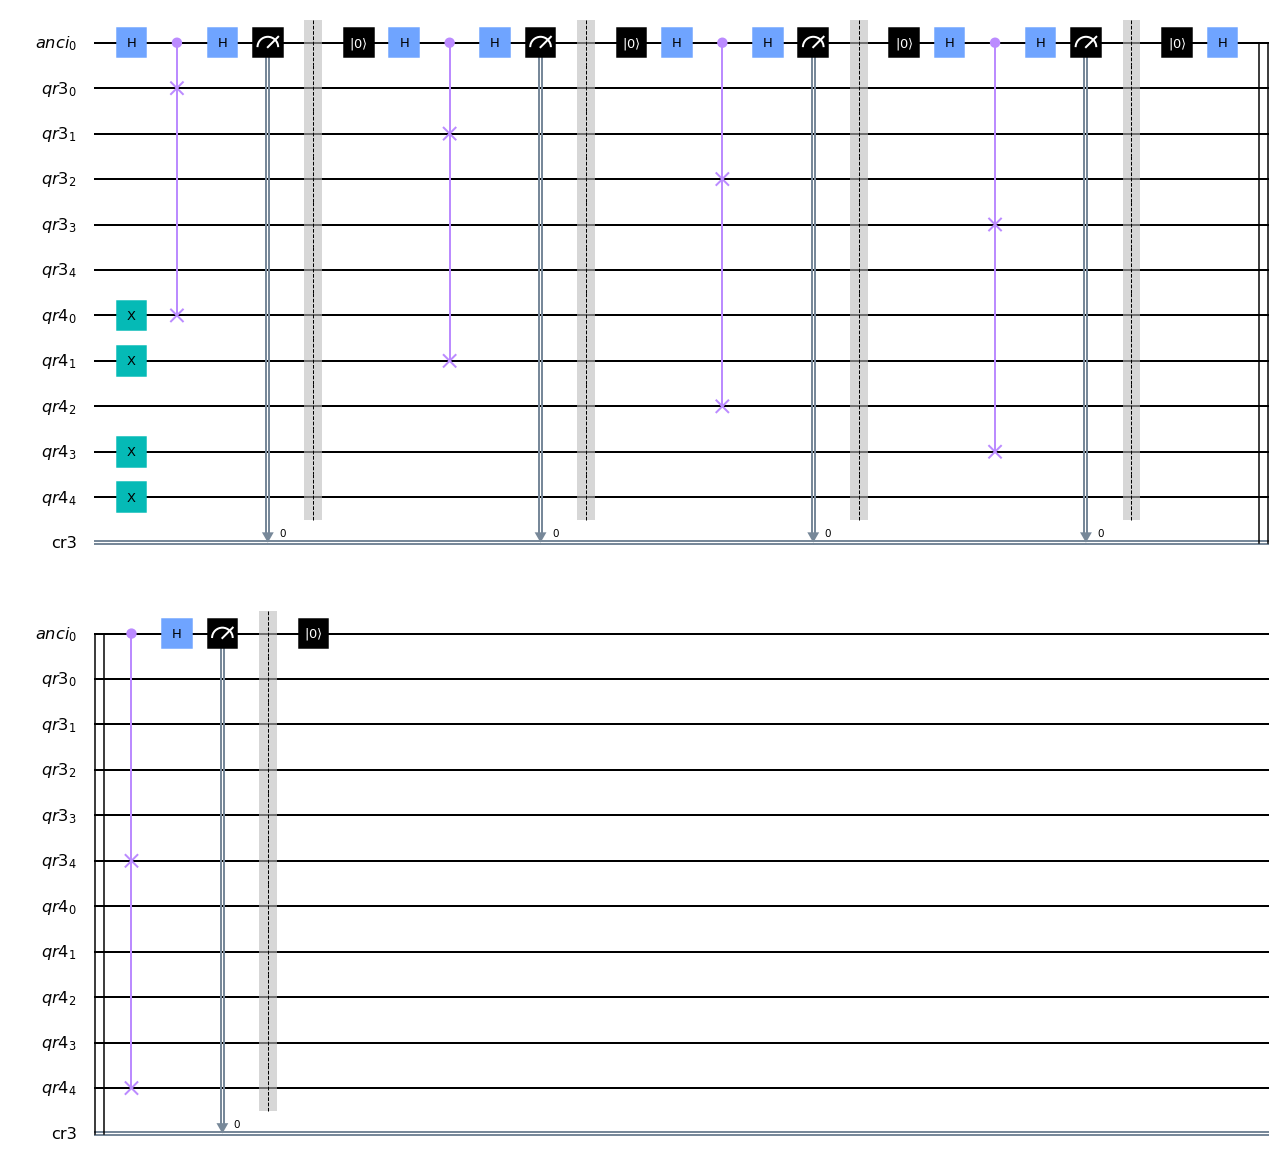

In [7]:
# n qubit random state (product state) reconstruction by means of swap test

random_state='11011' # this can be varied according to intrest. But should input as string.
n=len(random_state)

anci=QuantumRegister(1,name='anci')
qr3=QuantumRegister(n,name='qr3')
qr4=QuantumRegister(n,name='qr4')
cr3=ClassicalRegister(1,name='cr3')
qc3=QuantumCircuit(anci,qr3,qr4,cr3)

# creating n qubit random product state
for i in range(n):
    if random_state[i]=='1':
        qc3.x(qr4[i])     

shots=100 #how many times an experiment is repeated

recon_state=[]

for i in range(n):
    swap_test(anci[0],qr3[i],qr4[i],qc3)
    qc3.measure(anci[0],cr3[0])
    counts=execute(qc3,backend,shots=shots).result().get_counts()
    if shots in counts.values():
        recon_state.append(0)
    else:
        recon_state.append(1)
    qc3.barrier()
    qc3.reset(anci[0])

state=''.join(str(e) for e in recon_state)
print("The random state is",Ket(state))

qc3.draw(output='mpl')